In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [15]:
print(tf.__version__)
print(np.__version__)
import platform
print(platform.python_version())


2.13.1
1.24.3
3.8.2


In [16]:
# Load your data
df = pd.read_csv('/Users/anwarmujeeb/Desktop/CS171/Frontal/Frontal/model/synthetic_data/synthetic_homework_data.csv')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Problem Set']),
        ('cat', OneHotEncoder(), ['Subject']),
        ('ord', OrdinalEncoder(), ['Priority'])
    ])


In [17]:
# Splitting the data
X = df.drop('Time Required to Finish', axis=1)
y = df['Time Required to Finish']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [18]:
X_train_transformed.shape[1]

10

In [19]:
# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train_transformed.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Fit the model
# Fit the model and record the history


history = model.fit(X_train_transformed, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


2023-11-30 14:55:59.347189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 14:55:59.373787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


40/40 [==============================] - 1s 21ms/step - loss: 118726.5156 - val_loss: 124369.4844
Epoch 2/10
 1/40 [..............................] - ETA: 0s - loss: 125191.8672

2023-11-30 14:56:00.244334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 18ms/step - loss: 114657.0625 - val_loss: 117941.2500
Epoch 3/10
40/40 [==============================] - 1s 18ms/step - loss: 105672.0234 - val_loss: 105092.7266
Epoch 4/10
40/40 [==============================] - 1s 17ms/step - loss: 90007.1875 - val_loss: 85512.0156
Epoch 5/10
40/40 [==============================] - 1s 17ms/step - loss: 69319.0469 - val_loss: 62550.5117
Epoch 6/10
40/40 [==============================] - 1s 17ms/step - loss: 48342.1211 - val_loss: 42140.2617
Epoch 7/10
40/40 [==============================] - 1s 17ms/step - loss: 32476.8242 - val_loss: 29013.4258
Epoch 8/10
40/40 [==============================] - 1s 18ms/step - loss: 23835.1230 - val_loss: 22595.1758
Epoch 9/10
40/40 [==============================] - 1s 18ms/step - loss: 19824.2812 - val_loss: 19424.6270
Epoch 10/10
40/40 [==============================] - 1s 18ms/step - loss: 17368.4297 - val_loss: 17105.6445


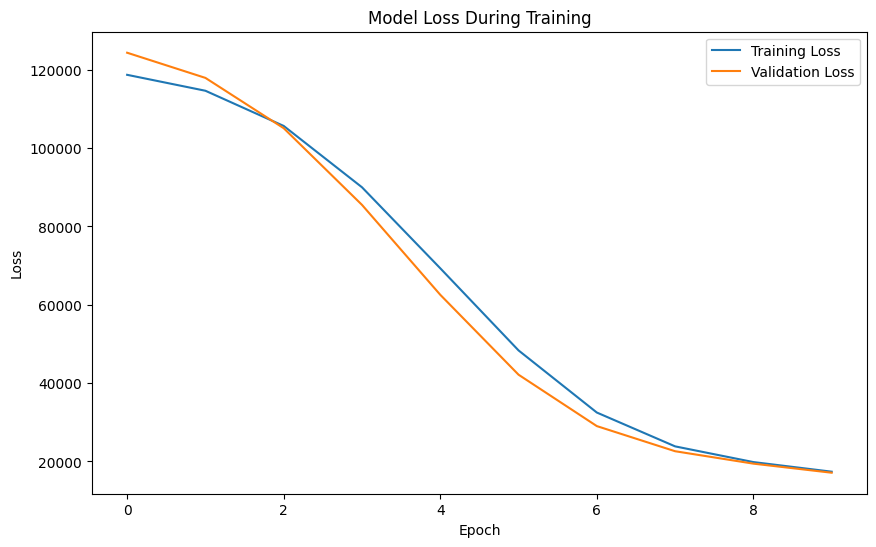

In [21]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

13/13 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 104.95906423449516
Mean Squared Error (MSE): 17518.968034346333
R-squared Score: 0.28319449626792614


2023-11-30 14:56:07.016720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
import pickle


In [24]:
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [25]:
model_save_path = 'model-v-0-1'
model.save(model_save_path)

INFO:tensorflow:Assets written to: model-v-0-1/assets


INFO:tensorflow:Assets written to: model-v-0-1/assets


In [26]:
# model_save_path = 'model.keras'
# model.save(model_save_path)

In [27]:
# model.save_weights('prelim_weights.h5')

###Testing if our model is correct

In [28]:
input_data = pd.DataFrame([["Math42", 23, "High"]], columns=['Subject', 'Problem Set', 'Priority'])
processed_input_data = preprocessor.transform(input_data)
print(processed_input_data)
model.predict(processed_input_data)

[[-1.90859293  0.          0.          0.          0.          0.
   1.          0.          0.          0.        ]]
1/1 [==============================] - 0s 24ms/step


array([[-13.901673]], dtype=float32)